# Julia Ordinary Least Squares (OLS) Regression
# _A Basic Example_
###### Copyright 2019 PredictiveModeler.com

## Table of Contents

- [Linear Regression in Julia](#Linear-Regression-in-Julia)  
  - [Overview](#Overview)  
  - [Data Exploration](#Data-Exploration)
  - [Basic Linear Regression](#Basic-Linear-Regression)  
  - [Additional Resources for learning more about OLS](#Additional-Resources-for-learning-more-about-OLS)

### Overview

Linear regression is one of _the_ most commonly used statistical modeling technique. While not as sexy as machine learning algorithms such as neural networks, it is one of the staple methods used throughout industry. Any card-carrying predictive modeler needs to know this one.

Julia is one of the more exciting new programming languages. You can get more info here(https://julialang.org/). I am particularly interested in the claims about high speed & performance. It is rare that a language with a high-level syntax is compiled to efficient native code. The language is new and has less support currently than more established predictive analytics scripting languages such as R and Python - but I think given the performance advantages it might go through a rapid growth spurt. Good for predictive modelers to begin learning this one, and the fact that both Python and Julia can be run through Anaconda/Jupyter - makes learning it easier!

In case you haven't already, I recommend going over the following prerequisite posts:

 - Installing Anaconda: https://predictivemodeler.com/2019/01/11/installing-anaconda/
 - Installing Julia: https://predictivemodeler.com/2019/01/11/installing-julia-language/

I won't go over the theory of linear regression. Instead, I will reference a few resources that do a good job of describing it. Please see the resource section. 

We will learn a few important things in this simple example, including:

 - How to load a tab-delimited text file into a data object
 - How to explore and plot the data we just loaded
 - How to fit a linear trend line to the data using OLS

### Data Exploration

First we import a couple of packages that will help us load the data. The data as well as this script is available for download at the bottom of this post. You can store the data pmds001.txt and change the link (i.e. 'D:\...') below to where you put it. We choose to call our data "sample_data". Remember in order to execute a 'cell' like the one below, you can 1) click on it and run it using the _run_ button above or 2) click in the cell and hit shift+enter.

First we install some packages that may not have been installed the first time you use Julia. To do that, you can uncomment (by removing '#') the lines below and run (by clicking into the cell and hitting shift+enter).

__Note:__ It will take a while to execute cells the first time you install/load/use packages. Subsequent executions will be faster.

In [12]:
#using Pkg
#Pkg.add("Plots")
#Pkg.add("CSV")
#Pkg.add("GLM")

In [22]:
using CSV
sample_data = CSV.read("D:/Data/PredictiveModeler/The Book/Benchmarked Data/pmds001.txt", delim='\t'); #Note the use of '/' instead of '\'
first(sample_data,5) #load 5 rows & inspect

,X,Y
,Int64⍰,Float64⍰
1,1,3.00417
2,2,3.32012
3,3,3.6693
4,4,4.0552
5,5,4.48169


In the cell below we plot the data in order to visually inspect it quickly. You will note that it __clearly__ is some sort of exponential function. But, we are going to fit a linear trendline anyway - because that's what this tutorial is about! In a future post we will go over the improved model fit we get when we try some non-linear modeling techniques. 

You will note that we first import a new library, _Plots_ that allows us to create a nice plot of our data.

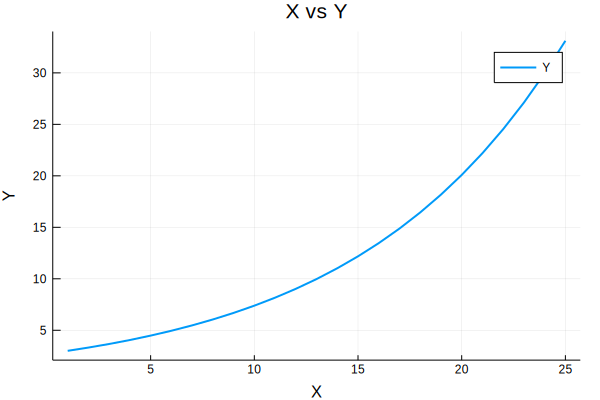

In [23]:
using Plots
X = sample_data[1]; Y = sample_data[2]
plot(X, Y, linewidth=2, title="X vs Y", label=["Y"], xlabel="X", ylabel="Y")

### Basic Linear Regression

In linear regression we _assume_ that the relationship between the independent variables (X) and the dependent variable (Y) is _linear_ and then go about finding one that minimizes the _squared error_ between the predicted Y and the actual Y.

$$
{y}_i = \beta_0 + \beta_1 {x}_i + \epsilon_i
$$

We now import the _lm_ method from the _GLM_ library. Note that the process of creating the model involves the very simple command. This runs the model and we find the intercept-term, $\beta_0$, and the coefficient $\beta_1$ that minimizes the squared errors.

In [24]:
using GLM
ols = lm(@formula(Y~X), sample_data)

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: Y ~ 1 + X

Coefficients:
             Estimate Std.Error  t value Pr(>|t|)
(Intercept)  -2.32318   1.13333 -2.04988   0.0519
X             1.16155 0.0762358  15.2363   <1e-12


We can inspect/load a few key values such as the coefficients executing the cell below. Other methods are available here: http://juliastats.github.io/GLM.jl/latest/manual/#Methods-applied-to-fitted-models-1

In [25]:
coef(ols) #load coefficients

2-element Array{Float64,1}:
 -2.3231844406599964
  1.161548199773846 

Finally, we can overlay the predicted trend-line with the actual data. Of course the fit is not great, but is the best we can do with a linear model while minimizing the squared-error. 

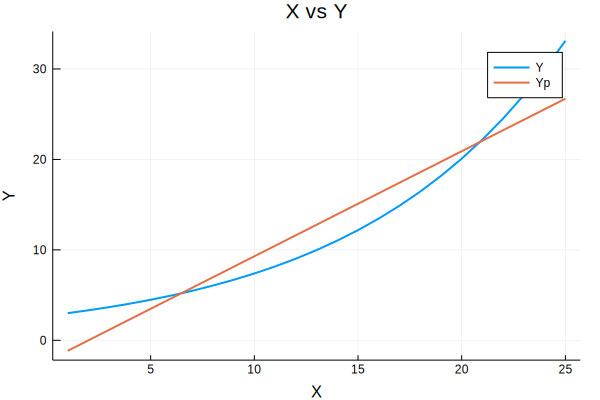

In [26]:
Yp = predict(ols); #load predictions into Yp
Y2 = Base.hcat(Y,Yp) #concatenating Y and Yp arrays into a new one called 'Y2' so that we can plot both, below
plot(X, Y2, linewidth=2, title="X vs Y", label=["Y", "Yp"], xlabel="X", ylabel="Y")

What if we want to find out the Mean Squared Error in our predictions? We can use the following:

In [21]:
#using Pkg
#Pkg.add("Distances")

In [27]:
using Distances
rmsd(Y,Yp) #Root Mean Squared Error (RMSE)

2.6364808504271435

Clearly, a linear model is not a great option for this. Can you spot a different _transformation_ of the Y variable that would be? Given that the Y seemingly increases exponentially relative to X, what happens if we plot __log(Y)__ vs X?

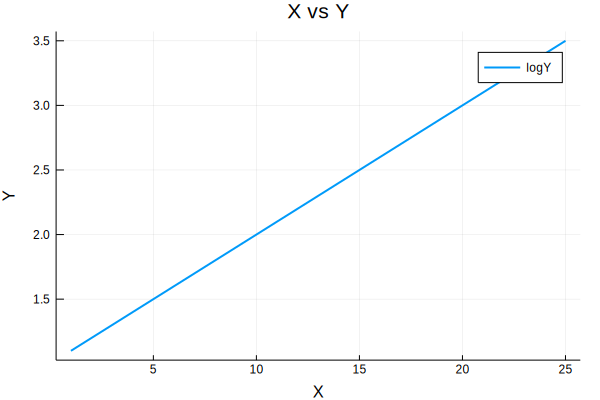

In [28]:
logY = log.(Y); # take elementwise log of Y
plot(X, logY, linewidth=2, title="X vs Y", label=["logY"], xlabel="X", ylabel="Y")

Looks linear now! Transformations & normalizations are useful in predictive modeling. We will explore them in future case studies. If you like, you can try fitting a linear model to logY as an exercise.

### Additional Resources for learning more about OLS

 - Wikipedia, of course! https://en.wikipedia.org/wiki/Linear_regression
 - https://newonlinecourses.science.psu.edu/stat501/node/251/
 - http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm